# **ECE 4424 Final Project Program Implementation**

**1. Libraries**

In [67]:

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


**2. Dataset**

In [65]:
# loads in the dataset
iris = datasets.load_iris()

# format the data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# view dataset
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

**3. View data output labels**

In [24]:
#view the output of each datapoint
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


**4. View data Information**

In [25]:
# view feature names
print("Names of each feature column:")
print(iris.feature_names)
print('\n')

# view output labels
print("Names of each possible output label:")
print(iris.target_names)
print('\n')


Names of each feature column:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Names of each possible output label:
['setosa' 'versicolor' 'virginica']




**5. Input and Output**


In [26]:
# assign X as the input and Y as the output
X = iris.data
Y = iris.target

# view the size of the input and output
print("shape of the input:")
print(X.shape)
print('\n')

print("shape of the output:")
print(Y.shape)
print('\n')

shape of the input:
(150, 4)


shape of the output:
(150,)




**6. Plotting the features**

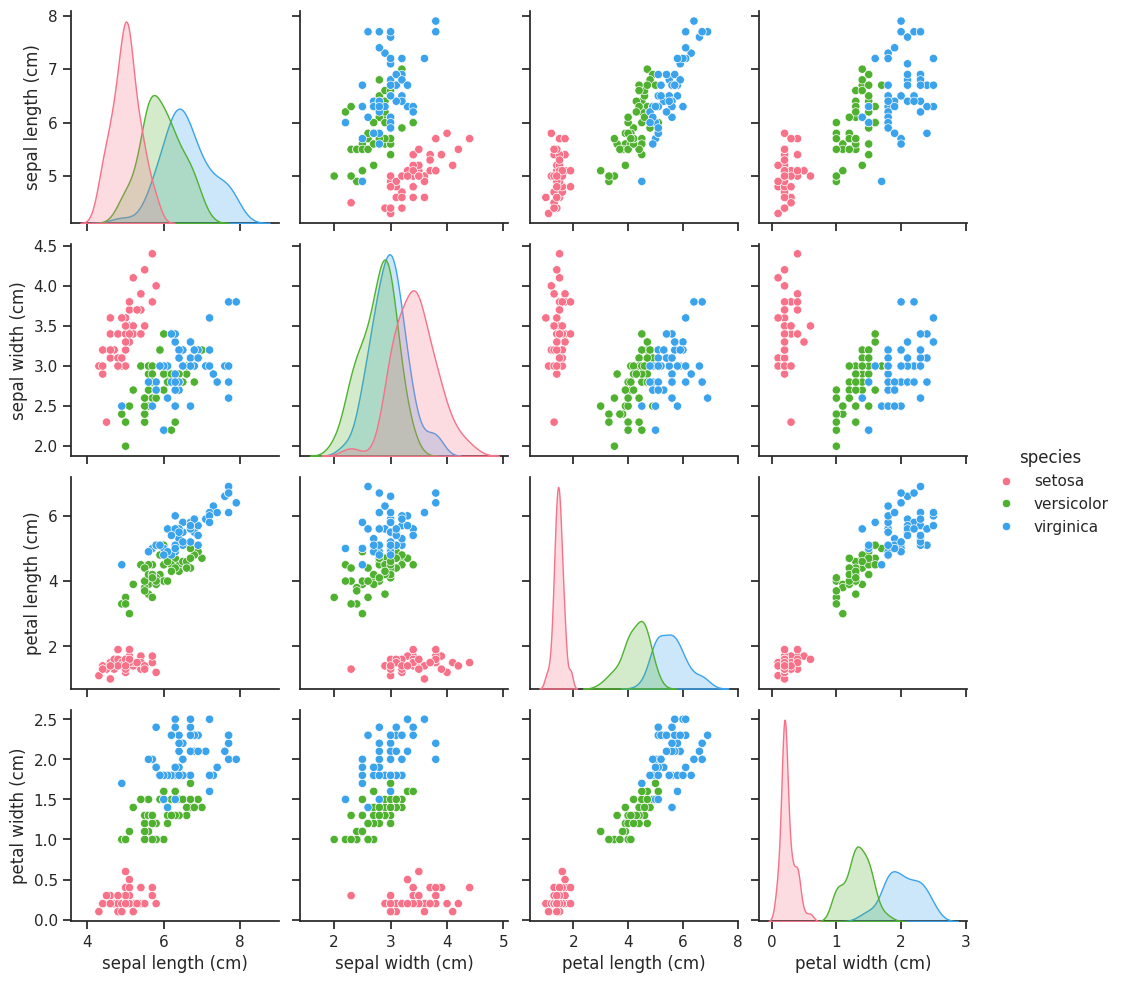

In [28]:
sns.set(style="ticks")
sns.pairplot(iris_df.drop(columns='target'), hue='species', palette="husl")
plt.show()

**7. Feature details**


In [52]:
# Calculate mean, standard deviation, and number of data points for each feature
feature_means = np.mean(X, axis=0)
feature_stddevs = np.std(X, axis=0)
num_data_points = X.shape[0]

# Display information
print(f"Total Number of Data Points: {num_data_points}")
print('\n')

for i, feature_name in enumerate(iris.feature_names):
    print(f"Feature: {feature_name}")
    print(f"Mean: {feature_means[i]:.2f}")
    print(f"Standard Deviation: {feature_stddevs[i]:.2f}")
    print(f"feature importance: {feature_importances[i]}")
    print('\n')

Total Number of Data Points: 150


Feature: sepal length (cm)
Mean: 5.84
Standard Deviation: 0.83
feature importance: 0.08365908390005723


Feature: sepal width (cm)
Mean: 3.06
Standard Deviation: 0.43
feature importance: 0.02233758299316475


Feature: petal length (cm)
Mean: 3.76
Standard Deviation: 1.76
feature importance: 0.4402332633773658


Feature: petal width (cm)
Mean: 1.20
Standard Deviation: 0.76
feature importance: 0.45377006972941225




**8. Feature Importance**

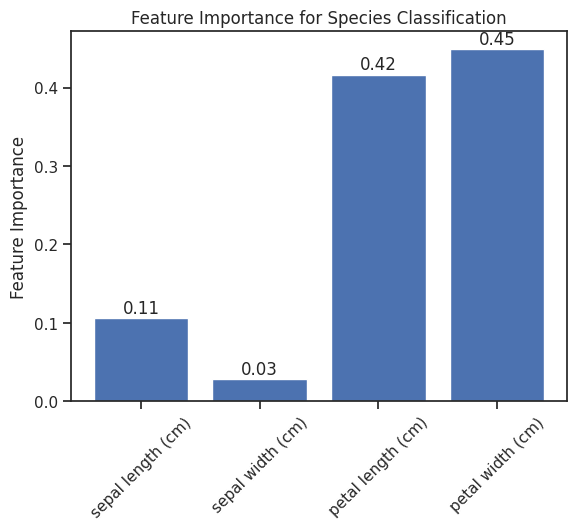

In [56]:
# create the model using the iris data
model = RandomForestClassifier()
model.fit(X, Y)

# view feature importance
feature_importances = model.feature_importances_

# view the feature importances
plt.bar(range(len(feature_importances)), feature_importances, tick_label=iris.feature_names)
plt.xticks(rotation=45)
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Species Classification')

for i, v in enumerate(feature_importances):
    plt.text(i, v+0.00125, f'{v:.2f}', ha='center', va='bottom')

plt.show()



**9. Model**

In [62]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

#shape of the split data
print("shape of the the training input data")
print(X_train.shape)
print('\n')

print("shape of the the training output data")
print(Y_train.shape)
print('\n')

print("shape of the the test input data")
print(X_test.shape)
print('\n')

print("shape of the the test output data")
print(Y_test.shape)
print('\n')

# new model with the split data
model.fit(X_train, Y_train)


shape of the the training input data
(90, 4)


shape of the the training output data
(90,)


shape of the the test input data
(60, 4)


shape of the the test output data
(60,)




RandomForestClassifier()

**10. Performance**

In [64]:
# model performance on the test data
print("predicted labels:")
print(model.predict(X_test))
print('\n')

# actual labels
print("actual labels:")
print(Y_test)
print('\n')

# model accuracy
print(model.score(X_test, Y_test))


predicted labels:
[0 2 0 1 0 2 0 1 2 2 2 2 1 1 0 2 0 1 0 0 1 2 0 2 1 1 1 0 0 0 1 2 0 1 2 2 2
 2 2 0 0 1 0 1 1 2 2 1 1 1 2 1 2 1 0 0 2 0 1 2]


actual labels:
[0 2 0 1 0 2 0 1 2 2 2 2 1 1 0 2 0 1 0 0 1 2 0 2 1 1 1 0 0 0 1 1 0 1 2 2 2
 2 2 0 0 1 0 1 1 2 2 2 1 1 2 1 2 1 0 0 2 0 1 2]


0.9666666666666667
